**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import math
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics

# **Data Loading and Cleaning**

**Importing the dataset from Kaggle**

In [ ]:
# !kaggle datasets download imakash3011/customer-personality-analysis
# !unzip customer-personality-analysis.zip

In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**Demographic**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products

Mnt[]: Amount spent on [] in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1 to 5: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

**Checking data type of the columns, as well as null and duplicated values**

In [ ]:
print(df.info())
print('----------------------------------------------------------')
print(df.isnull().sum())
print('----------------------------------------------------------')
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Drop null values**

In [ ]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

**Changing date type**

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')

**Rename columns**

In [ ]:
df = df.rename(columns = {
    'MntWines': 'Wines', 'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat', 'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets', 'MntGoldProds': 'Gold',
    })

#**Feature Engineering**


In [ ]:
for col in df.columns:
  print(f'{col}: {df[col].unique()} \n')

ID: [5524 2174 4141 ... 7270 8235 9405] 

Year_Birth: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1976 1959 1952 1987
 1946 1980 1949 1982 1979 1951 1969 1989 1963 1970 1973 1943 1975 1996
 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1983 1945 1991
 1962 1953 1956 1992 1961 1900 1986 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940] 

Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle'] 

Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'] 

Income: [58138. 46344. 71613. ... 56981. 69245. 52869.] 

Kidhome: [0 1 2] 

Teenhome: [0 1 2] 

Dt_Customer: <DatetimeArray>
['2012-09-04 00:00:00', '2014-03-08 00:00:00', '2013-08-21 00:00:00',
 '2014-02-10 00:00:00', '2014-01-19 00:00:00', '2013-09-09 00:00:00',
 '2012-11-13 00:00:00', '2013-05-08 00:00:00', '2013-06-06 00:00:00',
 '2014-03-13 00:00:00',
 ...
 '2014-03-27 00:00:00', '2012-12-15 00:00:00', '2012-09-17 00:00:00',
 '2013-06-02 00:00:00', '2012-12-21 00:00:00', '2013-

* Age = current year - year of birth
* Education: simplify
* Marital_Status: simplify
* MntAll: sum of all products' amount
* NumPurchases: sum of all purchases
* Family Size: sum of kid, teen, marital status (+1 for single, else +2)
* acceptedCmps: accepted campaigns(1,2,3,4,5 + response)
* remove columns: ID, Dt_Customer, Year_Birth, Kidhome, Teenhome, AcceptedCmp1,2,3,4 and 5, response, Complain, z_CostContact, z_Revenue

In [ ]:
#Age column
df['Age'] = dt.datetime.now().year - df['Year_Birth']
#Simplify Education
df['Education'] = df['Education'].replace({
    'Basic': 0, '2n Cycle': 0,
    'Graduation': 1, 'Master': 2, 'PhD': 3})

#Simplify Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace({
    'Together': 'Partnered', 'Married': 'Partnered',
    'Divorced': 'Single', 'Widow': 'Single', 'Alone': 'Single', 'Absurd' : 'Single', 'YOLO': 'Single'})

#Sum of products amount
df['MntAll'] = (df['Wines'] + df['Fruits'] + df['Meat']
              + df['Fish'] + df['Sweets'] + df['Gold'])

#Sum of purchases number
df['NumPurchases'] = (df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases'])

#Family Size
df['Family Size'] = df['Kidhome'] + df['Teenhome'] + np.where(df['Marital_Status'] == 'Single', 1,2)

#Total accepted campaigns
df['AcceptedCmps'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

#drop unnecessary columns
df = df.drop(columns = ['ID', 'Dt_Customer','Year_Birth', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2',
                        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Z_CostContact', 'Z_Revenue'])

<ipython-input-168-d3954c9e4dc2>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education'] = df['Education'].replace({


In [ ]:
df['Education'].unique()

array([1, 3, 2, 0])

**Conducting pairplot using important features**

Important features: 'Income', 'Education', 'Recency',
 'Age', 'MntAll', 'NumPurchases', 'Family Size', 'AcceptedCmps'

In [ ]:
imp_col = ['Income', 'Education', 'Recency', 'Age', 'MntAll', 'NumPurchases', 'Family Size', 'AcceptedCmps']
df[imp_col]

,Income,Education,Recency,Age,MntAll,NumPurchases,Family Size,AcceptedCmps
0,58138.0,1,58,68,1617,22,1,1
1,46344.0,1,38,71,27,4,3,0
2,71613.0,1,26,60,776,20,2,0
3,26646.0,1,26,41,53,6,3,0
4,58293.0,3,94,44,422,14,3,0
...,...,...,...,...,...,...,...,...
2235,61223.0,1,46,58,1341,16,3,0
2236,64014.0,3,56,79,444,15,5,1
2237,56981.0,1,91,44,1241,18,1,1
2238,69245.0,2,8,69,843,21,3,0


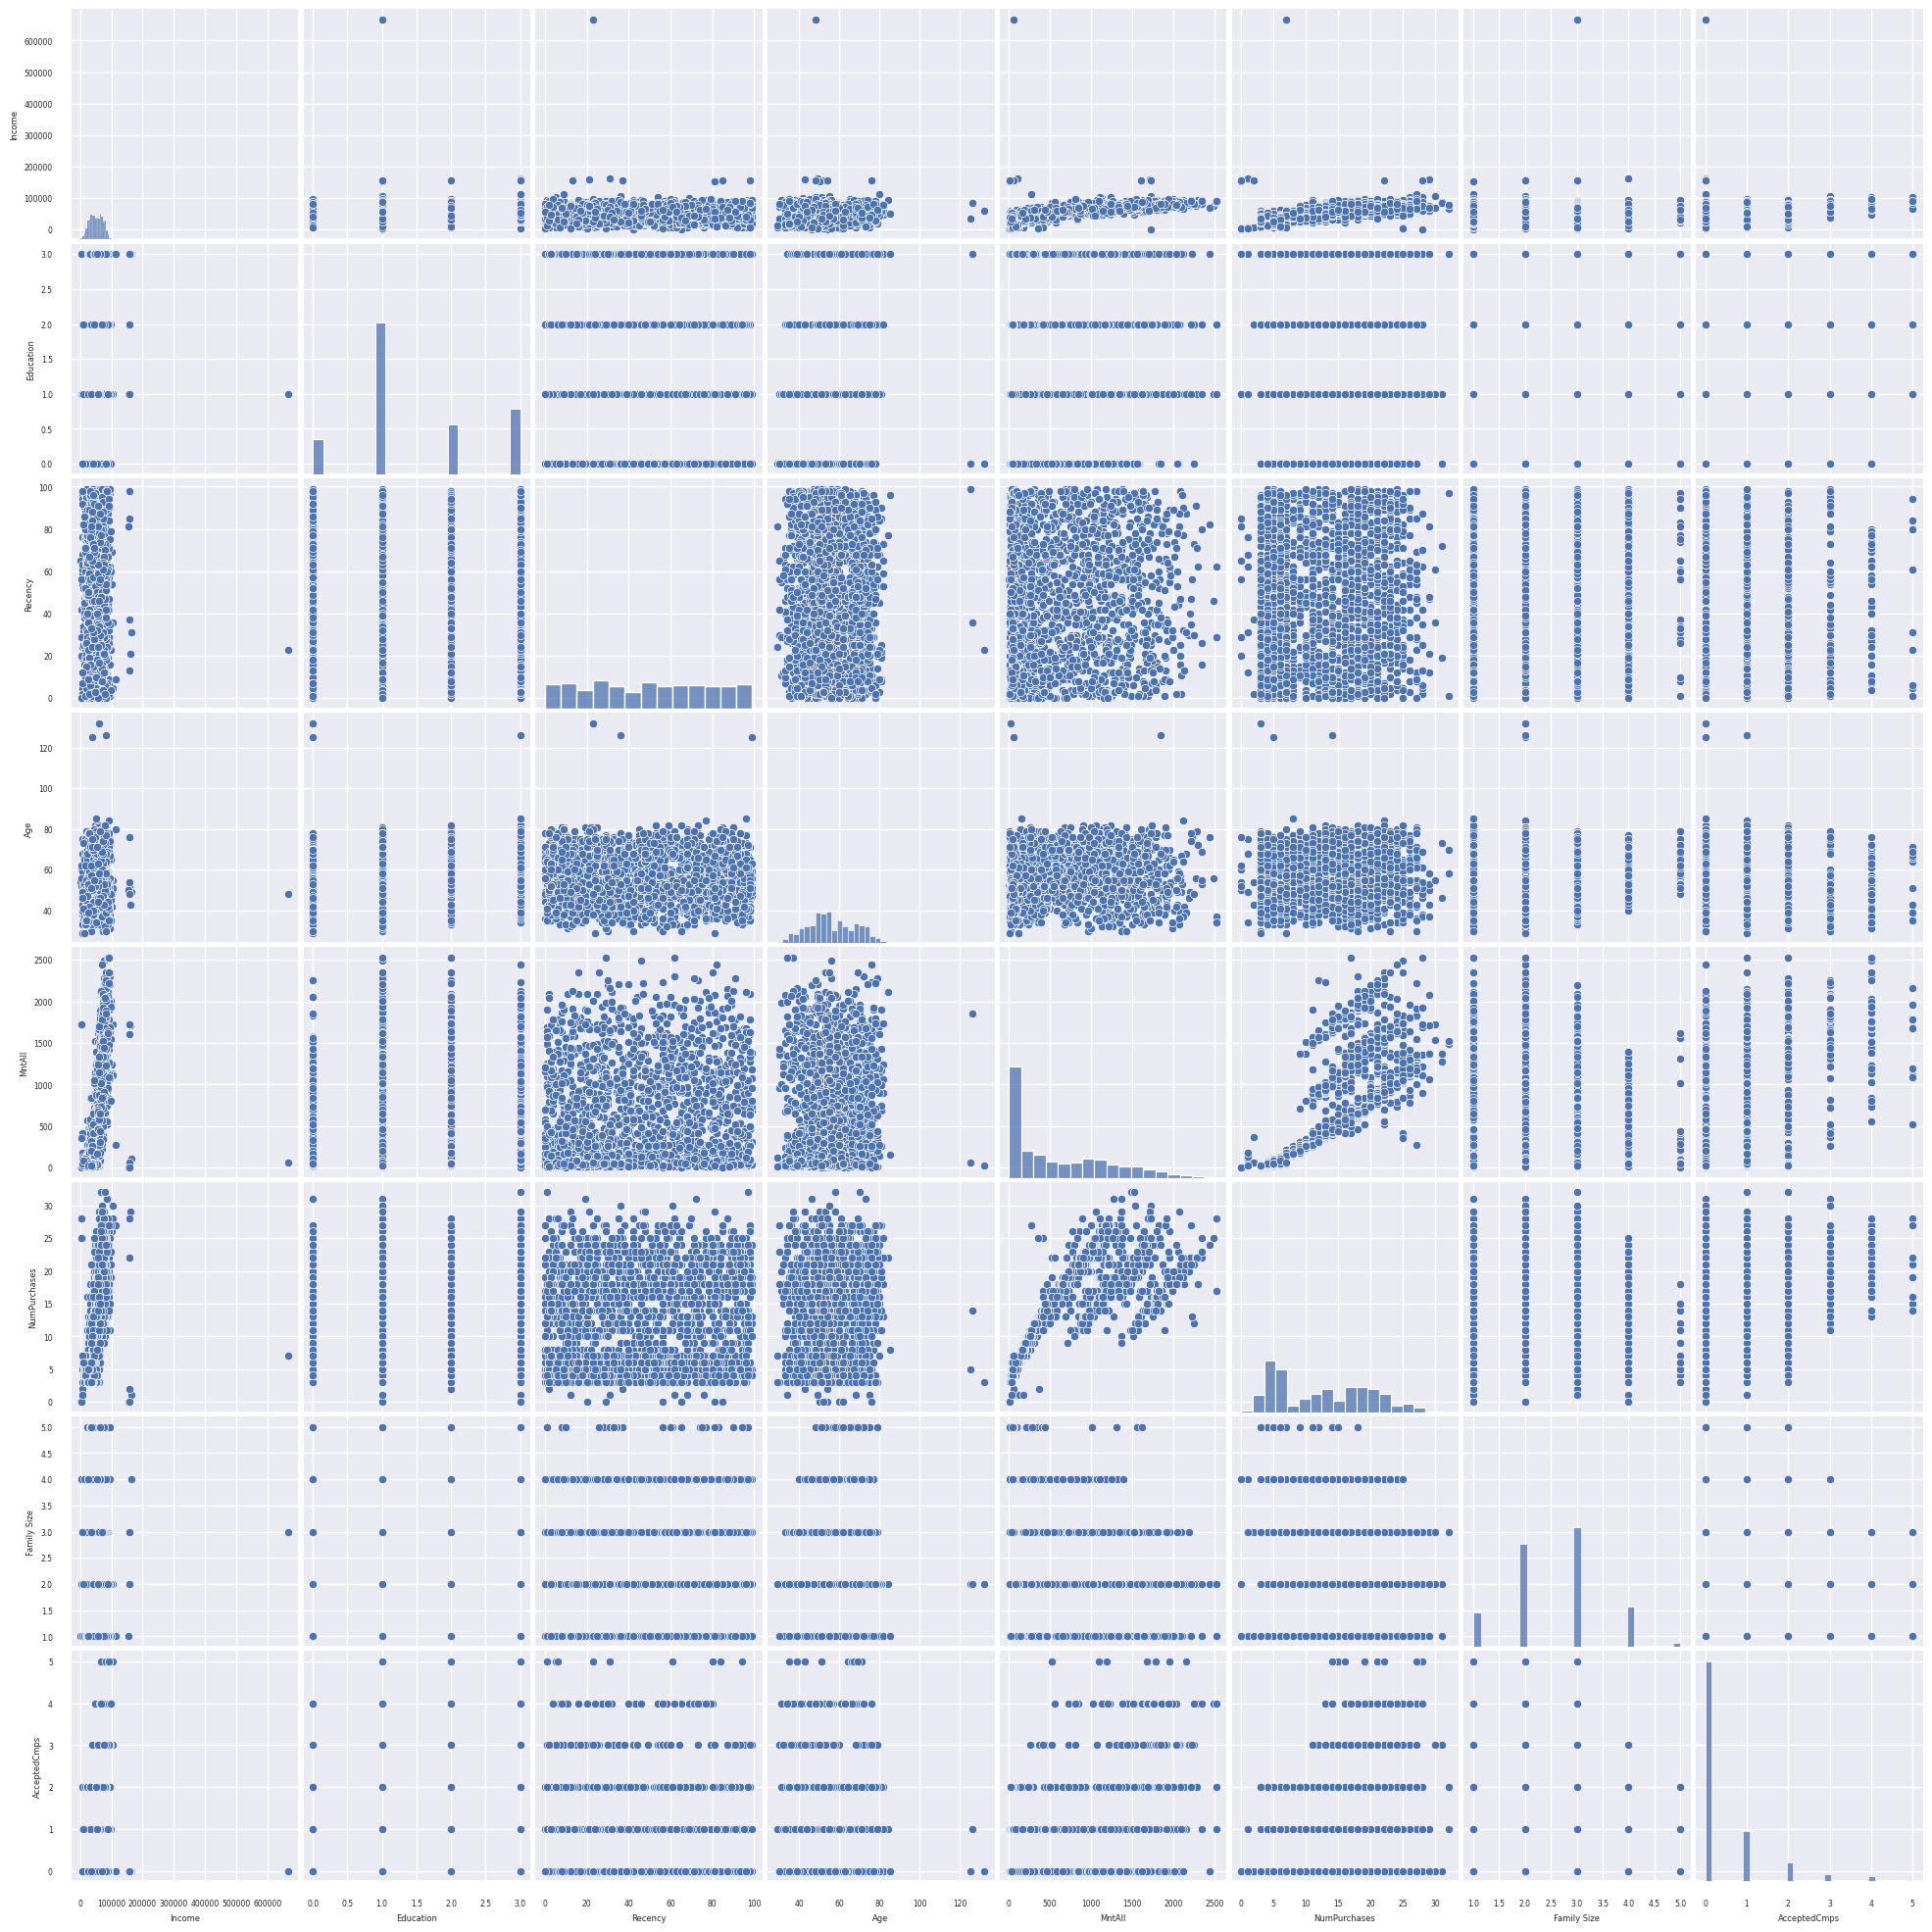

In [ ]:
sns.pairplot(df[imp_col])
plt.show()

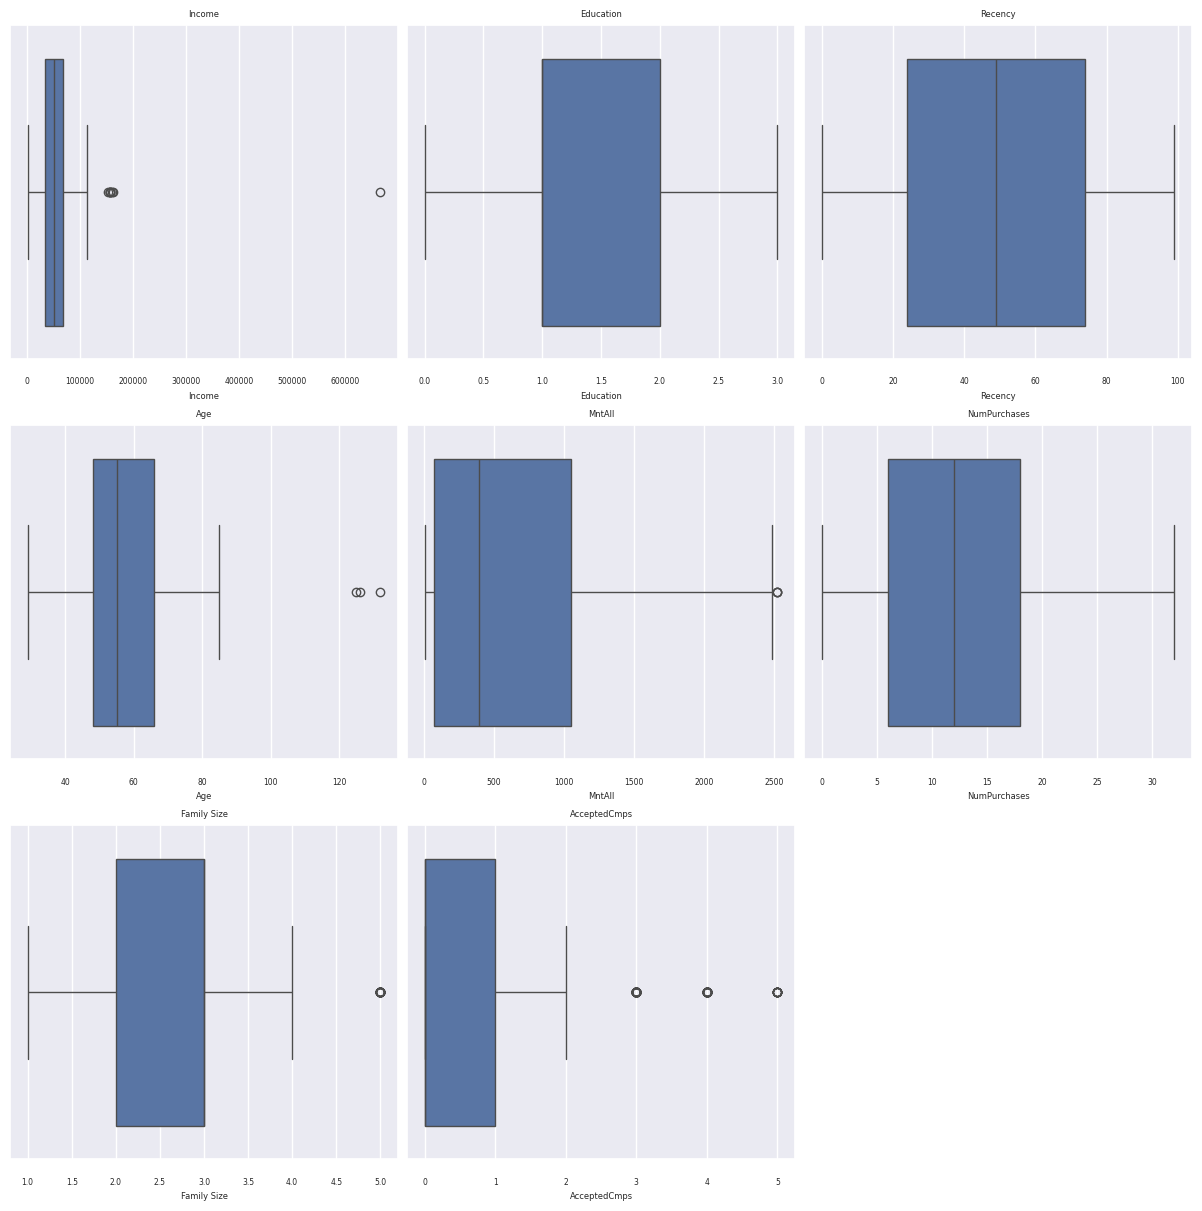

In [ ]:
def plot_boxplot(df):
  num_columns = len(df)
  num_rows = (num_columns + 2) // 3

  fig, axes = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))
  axes = axes.flatten()

  for i, column in enumerate(df.columns):
      sns.boxplot(x=df[column], ax=axes[i])
      axes[i].set_title(column)
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

plot_boxplot(df[imp_col])

There are some outliers in columns Income and Age which need to be removed.

In [ ]:
for col in ['Income', 'Age']:
  q1, q3 = np.percentile(df[col], [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df[imp_col].describe()

,Income,Education,Recency,Age,MntAll,NumPurchases,Family Size,AcceptedCmps
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,1.482540,49.009070,56.095692,606.821769,12.569615,2.593651,0.450340
std,20713.063826,0.954162,28.932111,11.705801,601.675284,7.180350,0.906197,0.894075
min,1730.000000,0.000000,0.000000,29.000000,5.000000,0.000000,1.000000,0.000000
25%,35196.000000,1.000000,24.000000,48.000000,69.000000,6.000000,2.000000,0.000000
50%,51287.000000,1.000000,49.000000,55.000000,397.000000,12.000000,3.000000,0.000000
75%,68281.000000,2.000000,74.000000,66.000000,1047.000000,18.000000,3.000000,1.000000
max,113734.000000,3.000000,99.000000,85.000000,2525.000000,32.000000,5.000000,5.000000


**Correlation Matrix**

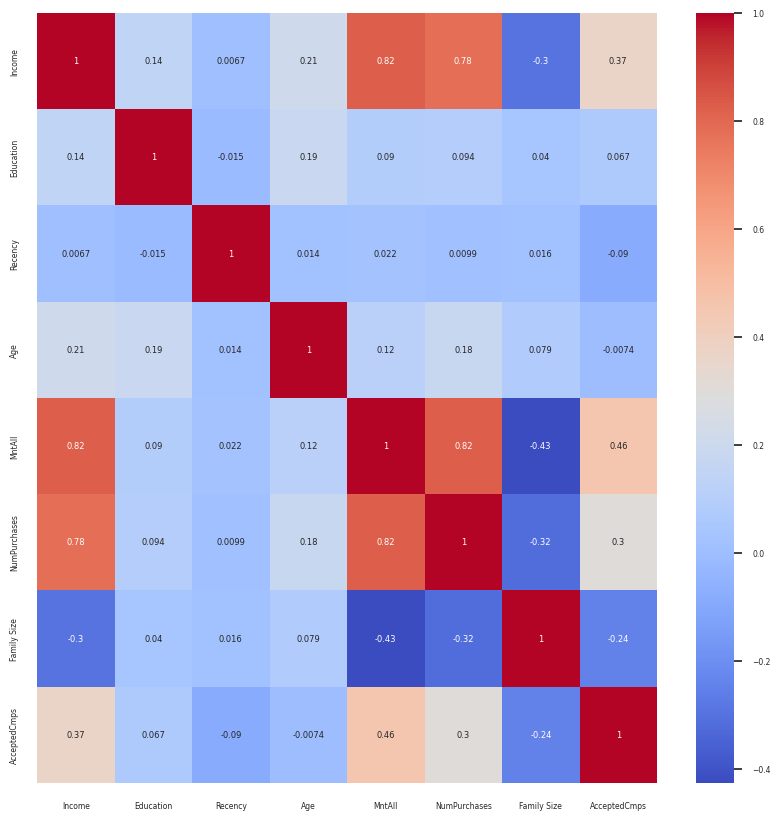

In [ ]:
num = df[imp_col].select_dtypes(include = ['int64', 'float64'])
sns.set(font_scale=0.5)
plt.figure(figsize = (10,10))
cm = num.corr()
sns.heatmap(num.corr(), annot = True, cmap = 'coolwarm')
plt.show()

Notable Correlation:
* **Income** is positively correlated with *'products amount purchases'* and *'number of purchases'*, but surprisingly negatively correlated with *'Web visits frequency'*.
* **Family Size** is positively correlated with number of *'purchases with discount deal'*, and *'Web visits frequency'*, while negatively correlated with *'products amount purchases'*, *'number of purchases'*
* **Accepted campaigns** is positively correlated with *'Income'*, *'products amount purchases'*, and *'number of purchases'*, while negatively correlated with *'Family Size'*

# **Data Preprocessing**

**Standard Scaling**

In [ ]:
new_df = df[imp_col].copy()
ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(new_df), columns = new_df.columns)
scaled_df.head()

,Income,Education,Recency,Age,MntAll,NumPurchases,Family Size,AcceptedCmps
0,0.314651,-0.505836,0.310830,1.017189,1.679323,1.313658,-1.759012,0.614920
1,-0.254877,-0.505836,-0.380600,1.273530,-0.963897,-1.193752,0.448513,-0.503808
2,0.965354,-0.505836,-0.795458,0.333612,0.281242,1.035057,-0.655250,-0.503808
3,-1.206087,-0.505836,-0.795458,-1.289883,-0.920675,-0.915151,0.448513,-0.503808
4,0.322136,1.590720,1.555404,-1.033542,-0.307248,0.199254,0.448513,-0.503808


**Dimensionality Reduction**

In [ ]:
pca = PCA(n_components = 3)
PCA_df = pd.DataFrame(pca.fit_transform(scaled_df), columns = ['P1', 'P2', 'P3'])
PCA_df.head()

,P1,P2,P3
0,2.485033,-0.419587,0.559124
1,-1.420963,0.774436,-0.258728
2,1.188412,-0.182545,-0.229443
3,-2.051210,-1.055594,-0.676910
4,-0.168199,0.715482,1.120053


Create 3D plot for PCA components

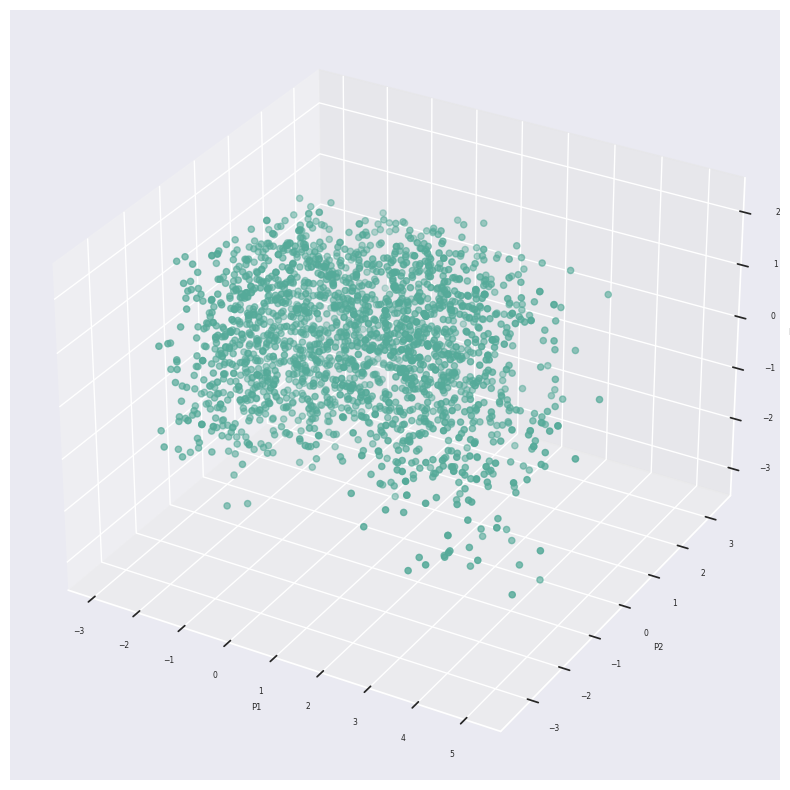

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(PCA_df['P1'], PCA_df['P2'], PCA_df['P3'], c = '#5A9', marker = 'o')
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')
plt.show()


# KMeans Clustering

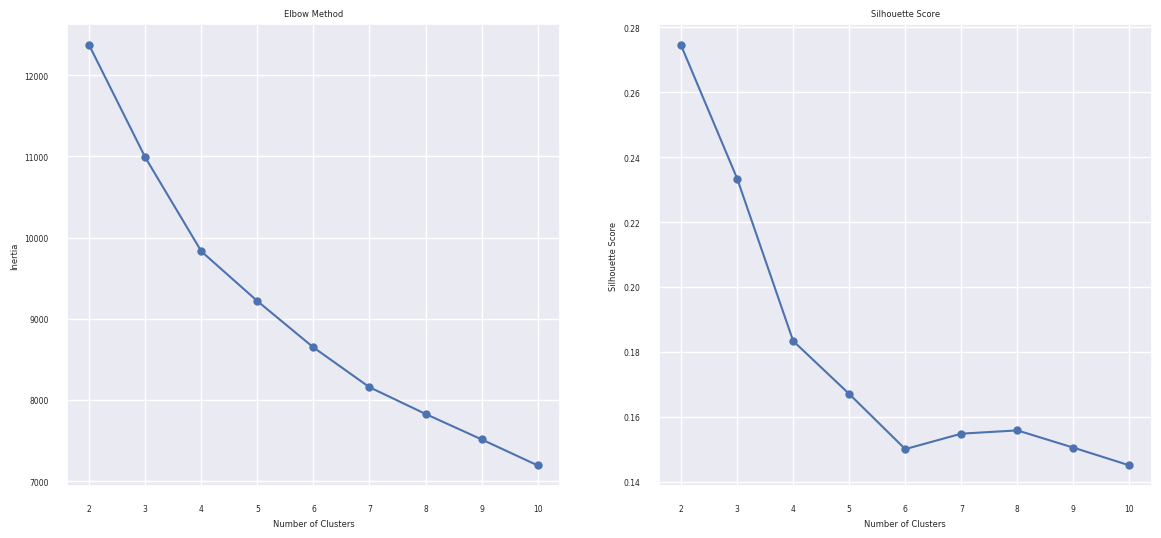

In [ ]:
max_k = 10

inertia = []
silhouette_scores = []

k_values = range(2, max_k + 1)
for k in k_values:
  kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)
  cluster_labels = kmeans.fit_predict(scaled_df)
  sil_score = silhouette_score(scaled_df, cluster_labels)
  silhouette_scores.append(sil_score)
  inertia.append(kmeans.inertia_)

plt.figure(figsize = (14,6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2,2)
plt.plot(k_values, silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.show()

--> K = 4

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)
kmeans_clusters = kmeans.fit_predict(scaled_df)

PCA_df['Clusters'] = kmeans_clusters
scaled_df['Clusters'] = kmeans_clusters
df['Clusters'] = kmeans_clusters

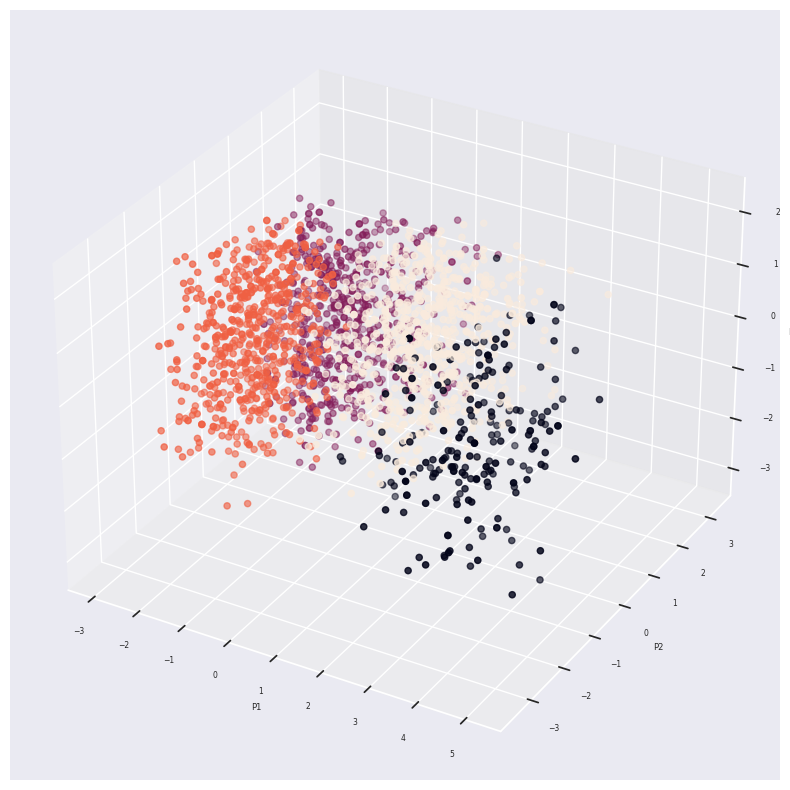

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(PCA_df['P1'], PCA_df['P2'], PCA_df['P3'], c = PCA_df['Clusters'], marker = 'o')
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')
plt.show()


# **Model Evaluation**

**Distribution of the clusters**

<ipython-input-181-b30895b15c77>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Clusters'], palette = 'viridis')


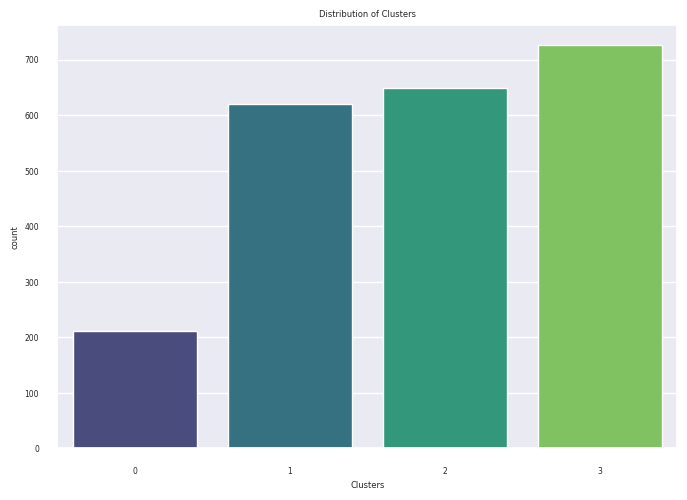

In [ ]:
sns.countplot(x=df['Clusters'], palette = 'viridis')
plt.title('Distribution of Clusters')
plt.show()

Visualising the relationship between MntAll and Income, with clusters

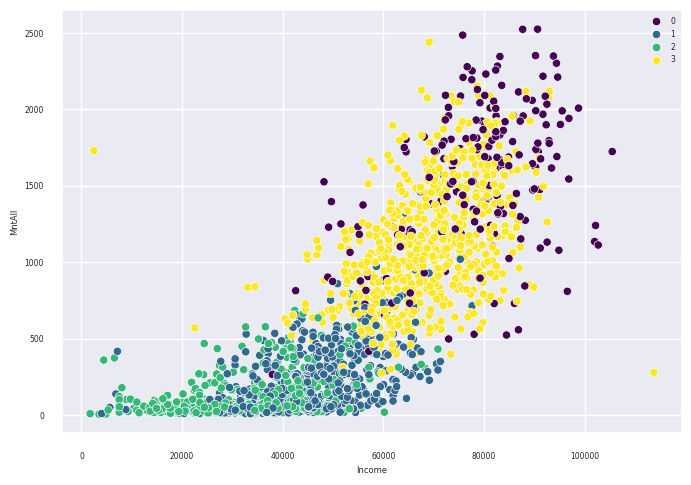

In [ ]:
sns.scatterplot(data = df, x = 'Income', y = 'MntAll', hue = 'Clusters', palette = 'viridis')
plt.legend()
plt.show()

Distribution of Promotion campaigns accepted

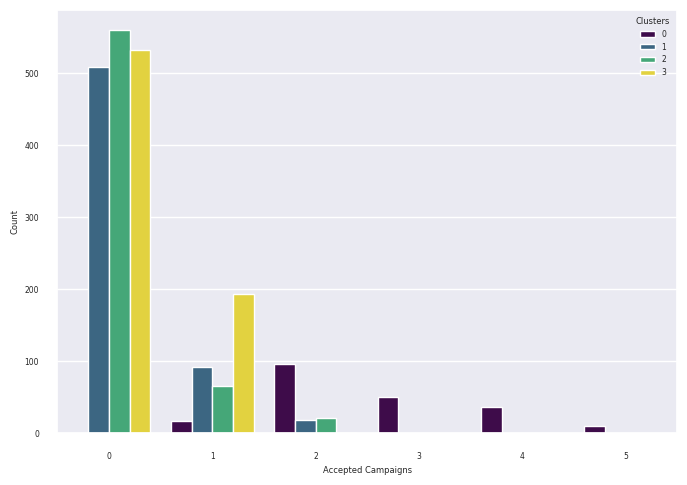

In [ ]:
plt.figure()
sns.countplot(data = df, x = 'AcceptedCmps', hue = df['Clusters'], palette = 'viridis')
plt.xlabel('Accepted Campaigns')
plt.ylabel('Count')
plt.show()

**Profiling the clusters**

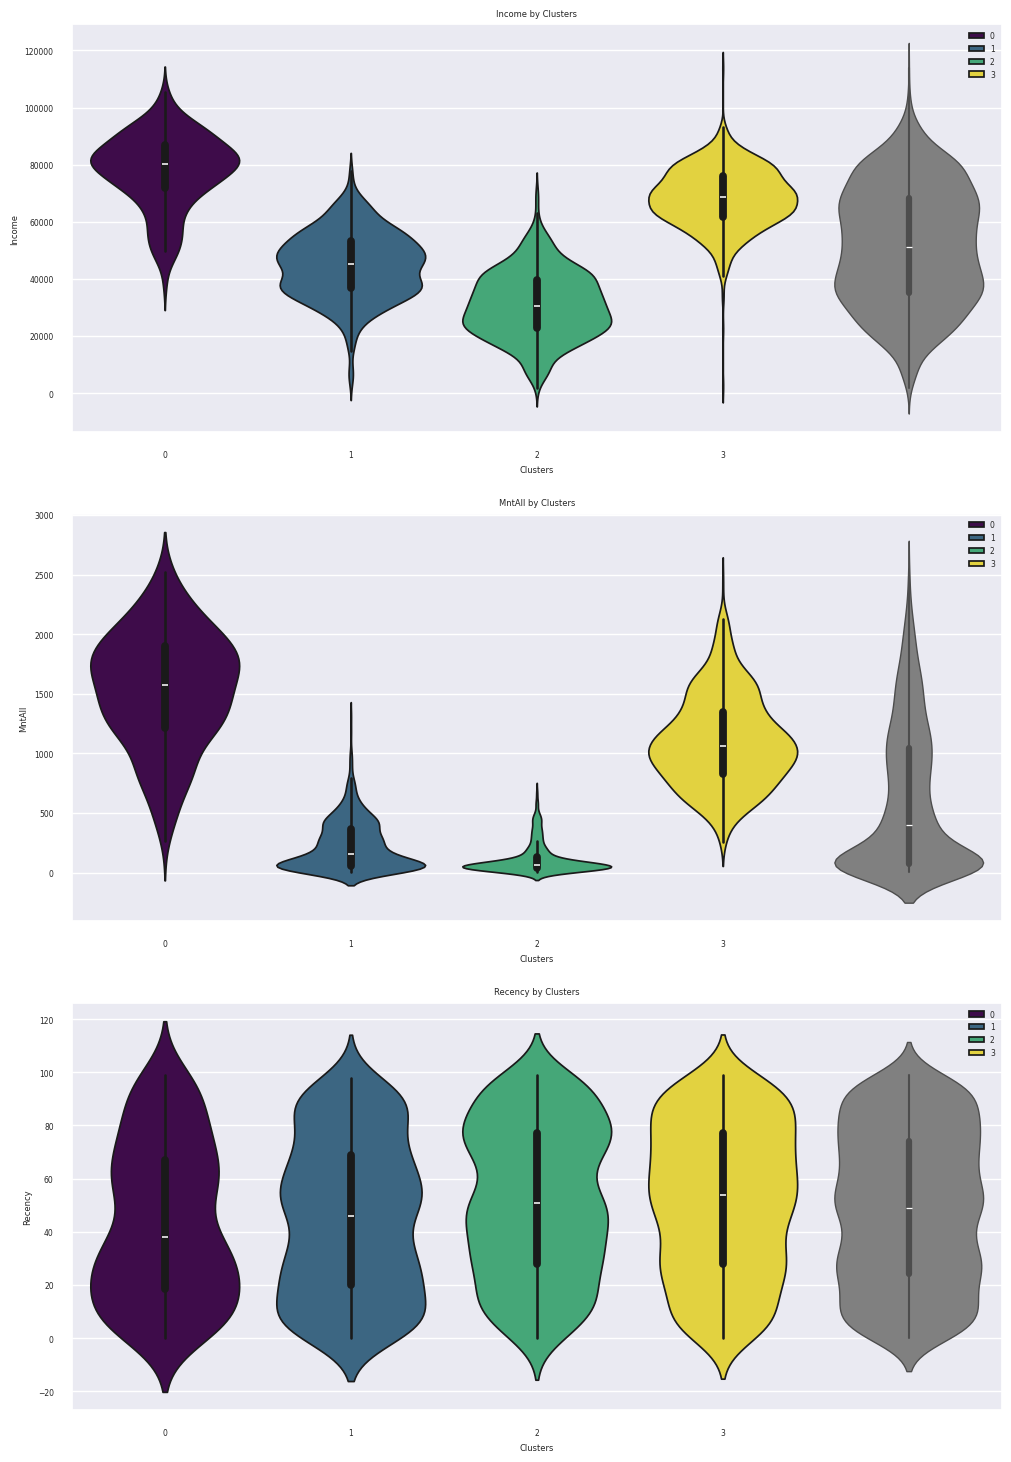

In [ ]:
plt.figure(figsize = (12,18))
plt.subplot(3,1,1)
sns.violinplot(x = df['Clusters'], y = df['Income'], palette = 'viridis', hue = df['Clusters'])
sns.violinplot(y = df['Income'], color = 'gray', linewidth = 1.0)
plt.title('Income by Clusters')
plt.ylabel('Income')

plt.subplot(3,1,2)
sns.violinplot(x = df['Clusters'], y = df['MntAll'], palette = 'viridis', hue = df['Clusters'])
sns.violinplot(y = df['MntAll'], color = 'gray', linewidth = 1.0)
plt.title('MntAll by Clusters')
plt.ylabel('MntAll')

plt.subplot(3,1,3)
sns.violinplot(x = df['Clusters'], y = df['Recency'], palette = 'viridis', hue = df['Clusters'])
sns.violinplot(y = df['Recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Clusters')
plt.ylabel('Recency')
plt.show()